In [2]:
# Autoreload extension for Jupyter notebooks
%load_ext autoreload
%autoreload 2

# Manual reload
from importlib import reload

# Magic commands for inline plotting and high-res figures
%matplotlib inline
%config InlineBackend.figure_format ='retina'

# Standard library imports
import os
import sys
import pickle

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
from tqdm import tqdm

# Add the parent directory to sys.path (if needed)
# from pathlib import Path
# sys.path.append(str(Path(os.getcwd()).parent))

# Pandas and plotting configurations
pd.set_option('display.max_rows', 1000)
idx = pd.IndexSlice

# Figure formatting
import rsmf
FIG_FORMATTER: rsmf.abstract_formatter.AbstractFormatter = rsmf.setup(
    r"\documentclass[a4paper,twocolumn,10pt,unpublished]{quantumarticle}"
)
COLORS = plt.get_cmap('tab10')
plt.rcParams.update({
    "axes.prop_cycle": plt.cycler("color", plt.cm.tab10.colors),
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "figure.constrained_layout.use": True,
    "figure.constrained_layout.h_pad": 0.02,
    "figure.constrained_layout.w_pad": 0.02,
    "figure.constrained_layout.hspace": 0.01,
    "figure.constrained_layout.wspace": 0.01,
    "legend.framealpha": 0.5,
})

# For in-line display of rsmf figures
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.use('module://matplotlib_inline.backend_inline')

# Utility functions
def write_pickle(path, obj):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)

def read_pickle(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj

from simulations.analysis.plotting_helpers import (
    error_band_plot, load_data
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## BB code

In [37]:
df_ps_dict = load_data("bb_sliding_window")

In [38]:
list(df_ps_dict.keys())

['committed_cluster_llr_norm_frac_2',
 'max_cluster_llr_norm_frac_2',
 'mean_cluster_llr_norm_frac_2']

In [45]:
df_ps_dict["committed_cluster_llr_norm_frac_2"].head(100)

p_fail  \
n   T  p     W F committed_cluster_llr_norm_frac_2                 
144 12 0.005 3 1 0.0006                             3.554378e-04   
                 0.0007                             3.810681e-05   
                 0.0008                             1.641595e-05   
                 0.0009                             1.077827e-05   
                 0.0010                             7.359008e-06   
                 0.0011                             5.799237e-06   
                 0.0012                             4.619316e-06   
                 0.0013                             3.908658e-06   
                 0.0014                             3.420079e-06   
                 0.0015                             2.997375e-06   
                 0.0016                             2.701433e-06   
                 0.0017                             2.348020e-06   
                 0.0018                             2.145058e-06   
                 0.0019                             1.943602e-06   
                 0.0020                             1.820887e-06   
                 0.0021                             1.701821e-06   
                 0.0022                             1.597371e-06   
                 0.0023                             1.515689e-06   
                 0.0024                             1.407733e-06   
                 0.0025                             1.336414e-06   
                 0.0026                             1.279452e-06   
                 0.0027                             1.210579e-06   
                 0.0028                             1.158028e-06   
                 0.0029                             1.114487e-06   
                 0.0030                             1.070867e-06   
                 0.0031                             1.025581e-06   
                 0.0032                             9.862565e-07   
                 0.0033                             9.502470e-07   
                 0.0034                             9.239185e-07   
                 0.0035                             8.863153e-07   
                 0.0036                             8.644066e-07   
                 0.0037                             8.438980e-07   
                 0.0038                             8.211681e-07   
                 0.0039                             8.014323e-07   
                 0.0040                             7.832178e-07   
                 0.0041                             7.643803e-07   
                 0.0042                             7.475450e-07   
                 0.0043                             7.331530e-07   
                 0.0044                             7.149771e-07   
                 0.0045                             7.031979e-07   
                 0.0046                             6.864600e-07   
                 0.0047                             6.671468e-07   
                 0.0048                             6.560718e-07   
                 0.0049                             6.426379e-07   
                 0.0050                             6.264159e-07   
                 0.0051                             6.134515e-07   
                 0.0052                             6.033918e-07   
                 0.0053                             5.946492e-07   
                 0.0054                             5.839111e-07   
                 0.0055                             5.747898e-07   
                 0.0056                             5.656490e-07   
                 0.0057                             5.550566e-07   
                 0.0058                             5.459687e-07   
                 0.0059                             5.355561e-07   
                 0.0060                             5.294444e-07   
                 0.0061                             5.216792e-07   
                 0.0062                             5.133964e-07   
                 0.0063                       

In [46]:
df_ps_ordinary = load_data("bb_old")["cluster_llr_norm_2"]

df_ps_ordinary.head(100)

p_fail  delta_p_fail   p_abort  \
n  T p     cluster_llr_norm                                         
72 6 0.001 0.537231          2.930787e-08  2.930787e-08  0.934464   
           5.909539          1.560402e-08  1.560402e-08  0.876908   
           6.446770          1.205109e-08  1.205109e-08  0.840618   
           6.984000          9.663292e-09  9.663292e-09  0.801234   
           8.058462          7.295794e-09  7.295794e-09  0.736735   
           8.595693          6.515680e-09  6.515680e-09  0.705214   
           9.132923          3.518492e-08  1.915201e-08  0.661198   
           9.670155          2.923820e-08  1.591506e-08  0.592289   
           10.207385         2.566646e-08  1.397088e-08  0.535552   
           10.744616         4.879769e-08  1.878596e-08  0.489305   
           11.281847         8.797310e-08  2.440879e-08  0.443913   
           11.819077         1.075105e-07  2.576328e-08  0.386844   
           12.356308         1.241593e-07  2.672819e-08  0.340196   
           12.893539         1.842815e-07  3.169165e-08  0.300414   
           13.430770         4.471647e-07  4.825418e-08  0.264431   
           13.968000         5.776174e-07  5.373459e-08  0.233194   
           14.505231         9.815822e-07  6.889061e-08  0.206464   
           15.042462         1.420837e-06  8.173309e-08  0.183635   
           15.579693         2.060163e-06  9.713869e-08  0.161755   
           16.116924         2.987036e-06  1.157345e-07  0.143659   
           16.654154         3.891842e-06  1.308574e-07  0.127169   
           17.191385         5.045764e-06  1.478040e-07  0.112935   
           17.728617         6.462233e-06  1.661388e-07  0.100788   
           18.265846         7.657312e-06  1.798445e-07  0.090683   
           18.803078         9.138181e-06  1.956182e-07  0.082758   
           19.340309         1.087542e-05  2.126553e-07  0.076273   
           19.877539         1.229994e-05  2.254704e-07  0.070652   
           20.414770         1.425124e-05  2.420542e-07  0.065701   
           20.952002         1.612418e-05  2.568221e-07  0.060981   
           21.489231         1.817747e-05  2.719062e-07  0.055593   
           22.026463         2.011404e-05  2.853260e-07  0.050965   
           22.563694         2.191659e-05  2.970362e-07  0.045840   
           23.100924         2.366149e-05  3.079321e-07  0.041484   
           23.638155         2.520684e-05  3.172272e-07  0.037844   
           24.175386         2.650833e-05  3.248317e-07  0.034985   
           24.712616         2.765541e-05  3.314191e-07  0.032850   
           25.249847         2.863335e-05  3.369228e-07  0.031098   
           25.787079         2.960068e-05  3.423177e-07  0.029687   
           26.324308         3.073508e-05  3.485568e-07  0.028247   
           26.861540         3.220553e-05  3.565747e-07  0.027033   
           27.398769         3.384251e-05  3.652680e-07  0.025666   
           27.936001         3.546514e-05  3.736950e-07  0.024481   
           28.473232         3.675569e-05  3.802053e-07  0.023310   
           29.010462         3.795474e-05  3.861285e-07  0.022153   
           29.547693         3.895488e-05  3.909928e-07  0.021203   
           30.084925         3.984940e-05  3.952870e-07  0.020364   
           30.622154         4.053195e-05  3.985307e-07  0.019738   
           31.159386         4.110930e-05  4.012642e-07  0.019275   
           31.696617         4.156770e-05  4.034237e-07  0.018928   
           32.233849         4.193936e-05  4.051573e-07  0.018609   
           32.771080         4.239740e-05  4.072978e-07  0.018291   
           33.308308         4.288182e-05  4.095526e-07  0.017977   
           33.845539         4.344590e-05  4.121647e-07  0.017631   
           34.382771         4.408955e-05  4.151265e-07  0.017252   
           34.920002         4.464127e-05  4.176262e-07  0.016831   
           35.457233         4.515245e-05  4.199281e-07  0.016445   
           35.994461         4.56

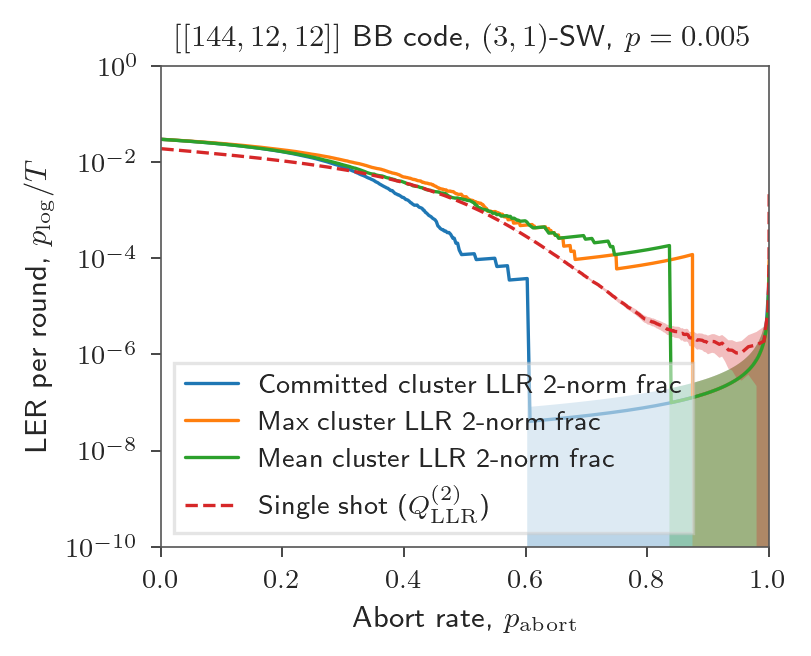

In [36]:
fig = FIG_FORMATTER.figure(aspect_ratio=0.8)
ax = fig.add_subplot()
n, T, p, W, F = prms = (144, 12, 5e-3, 3, 1)
labels = {
    "mean_cluster_llr_norm_frac_2": r"Mean cluster LLR 2-norm frac",
    "max_cluster_llr_norm_frac_2": r"Max cluster LLR 2-norm frac",
    "committed_cluster_llr_norm_frac_2": r"Committed cluster LLR 2-norm frac",
}
for by in df_ps_dict.keys():
    df_ps = df_ps_dict[by].loc[prms]
    error_band_plot(
        df_ps["p_abort"],
        df_ps["p_fail"] / T,
        df_ps["delta_p_fail"] / T,
        ax=ax,
        label=labels[by],
    )

df_ps_ordinary_sng = df_ps_ordinary.loc[(n, T, p)]
error_band_plot(
    df_ps_ordinary_sng["p_abort"],
    df_ps_ordinary_sng["p_fail"] / T,
    df_ps_ordinary_sng["delta_p_fail"] / T,
    ax=ax,
    linestyle="--",
    label=r"Single shot ($Q_\mathrm{LLR}^{(2)}$)",
)

ax.set_yscale("log")
ax.set_xlim(0, 1)
ax.set_ylim(1e-10, 1)

ax.set_xlabel("Abort rate, $p_\mathrm{abort}$")
ax.set_ylabel("LER per round, $p_\mathrm{log}/T$")
ax.set_title(rf"$[[144, 12, 12]]$ BB code, $(3,1)$-SW, $p={p:.3f}$", fontsize=9)

ax.legend(fontsize=8)